# Homework 6


This homework is designed to process a large csv file (bigger than pandas can handle)
https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true

Write code to perform/answer the following actions:

1. Print how many records processed
1. Create a histogram of ages
1. List the top 20 occupations 

Don't use Pandas or Dask

In [1]:
from zipfile import ZipFile

In [2]:
from urllib import request

def download_file(file_name, file_url):
    res = request.urlopen(file_url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [3]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true'
file_name = 'bigfile'
download_file(file_name, file_url)

In [4]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [5]:
#Print how many records processed
unzip(file_name)

File Name                                             Modified             Size
bigfile.csv                                    2022-03-07 20:08:48  18034182194
Extracting all the files now...
Done!


[('Joshua', 'Cruz', 1990, 32, 'Producer- television/film/video', '743-19-2943', 0)
 ('Samuel', 'Barrera', 2001, 21, 'Forensic psychologist', '696-37-5079', 0)
 ('John', 'Perez', 1963, 59, 'Financial adviser', '165-50-1258', 0) ...
 ('Roger', 'Johnson', 1952, 70, 'Trading standards officer', '602-20-4113', 0)
 ('Elizabeth', 'Williams', 1940, 82, 'Leisure centre manager', '818-52-2199', 0)
 ('Gregory', 'Hunter', 1947, 75, 'Conference centre manager', '440-03-1888', 0)]


(array([8.5883e+04, 1.4155e+04, 1.5712e+04, 2.3216e+04, 1.8825e+04,
        2.0085e+04, 2.8615e+04, 2.2564e+04, 2.3521e+04, 2.3684e+04,
        3.1678e+04, 2.3815e+04, 2.3423e+04, 3.0524e+04, 2.2018e+04,
        2.1015e+04, 2.5875e+04, 1.8097e+04, 1.6589e+04, 1.5307e+04,
        1.8096e+04, 1.1884e+04, 1.0425e+04, 1.1937e+04, 7.7820e+03,
        6.5770e+03, 7.0180e+03, 4.2400e+03, 3.6590e+03, 2.9990e+03,
        3.0610e+03, 1.7870e+03, 1.4120e+03, 1.4080e+03, 8.3500e+02,
        6.0800e+02, 5.4800e+02, 2.9800e+02, 2.2600e+02, 1.9000e+02,
        1.5300e+02, 8.3000e+01, 6.2000e+01, 5.2000e+01, 2.2000e+01,
        1.3000e+01, 1.0000e+01, 6.0000e+00, 3.0000e+00, 5.0000e+00]),
 array([ 17. ,  20.3,  23.6,  26.9,  30.2,  33.5,  36.8,  40.1,  43.4,
         46.7,  50. ,  53.3,  56.6,  59.9,  63.2,  66.5,  69.8,  73.1,
         76.4,  79.7,  83. ,  86.3,  89.6,  92.9,  96.2,  99.5, 102.8,
        106.1, 109.4, 112.7, 116. , 119.3, 122.6, 125.9, 129.2, 132.5,
        135.8, 139.1, 142.4, 145.7

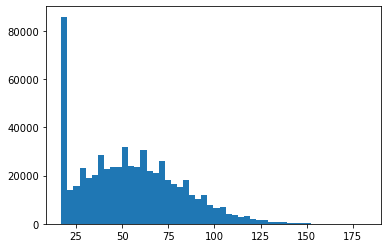

In [56]:

import csv
import numpy as np
import matplotlib.pyplot as plt


data = np.genfromtxt("bigfile.csv", delimiter=",", names=["first_name", "last_name","year","age","T", "g", "lk"],dtype=None,encoding='utf-8')
print(data)

plt.hist(data['age'], bins = 50)



In [58]:
data

array([('Joshua', 'Cruz', 1990, 32, 'Producer- television/film/video', '743-19-2943', 0),
       ('Samuel', 'Barrera', 2001, 21, 'Forensic psychologist', '696-37-5079', 0),
       ('John', 'Perez', 1963, 59, 'Financial adviser', '165-50-1258', 0),
       ...,
       ('Roger', 'Johnson', 1952, 70, 'Trading standards officer', '602-20-4113', 0),
       ('Elizabeth', 'Williams', 1940, 82, 'Leisure centre manager', '818-52-2199', 0),
       ('Gregory', 'Hunter', 1947, 75, 'Conference centre manager', '440-03-1888', 0)],
      dtype=[('first_name', '<U11'), ('last_name', '<U11'), ('year', '<i8'), ('age', '<i8'), ('T', '<U59'), ('g', '<U11'), ('lk', '<i8')])

In [59]:
print('Total records processed',len(data))

Total records processed 600000


In [62]:
import csv

occupation=[]
with open('bigfile.csv', 'r') as file:
    while(True):
        line = file.readline()#Reading line by line from CSV file
        if not line:
            break
        line2 = line.split(',')
       
        occupation.append(line2[4])#appending all the occupations to another list
file.close()


In [63]:
#List the top 20 occupations



a=[]
occupation_u = []
count_list=[]
for i in occupation:
    if i not in occupation_u :
        occupation_u.append(i)#appending all the unique occupations in to a list
        
for i in occupation_u :
    c = occupation.count(i)
    count_list.append(c)#Counting the Number of Occupations
    
dict1 = dict(zip(occupation_u,count_list))#Converting the lists in to Dictionary 

sorted_dict = sorted(dict1.items(),key=lambda x:x[1],reverse=True)

for i in range(0,639):
    s = sorted_dict[i][0]
    a.append(s)
print('Top 20 Occupations :')
for i in range(0,20):
    print(a[i])

Top 20 Occupations :
Scientist- product/process development
Psychiatric nurse
Therapist- sports
Toxicologist
Social researcher
Environmental health practitioner
Naval architect
Teacher- primary school
Administrator- charities/voluntary organisations
Chartered loss adjuster
Photographer
Field trials officer
Radio producer
Ranger/warden
Electrical engineer
Radiographer- diagnostic
Acupuncturist
Administrator- education
Quantity surveyor
Research scientist (medical)
